In [5]:
import os
import os.path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import matplotlib.dates as mdates

In [6]:
# Importing the dataset
datadir = "data/tidy_data"
data = os.path.join(datadir, "coded_injuries.csv")
df_injuries = pd.read_csv(data)

# Function for converting date format from American to ISO formatting
def date_coversion(date):
    date_object = datetime.strptime(date, '%m-%d-%Y')
    iso_format_date = date_object.strftime('%Y-%m-%d')
    return iso_format_date

# Changing date formatting
df_injuries.drop(columns = ["DateOfReturn"], inplace = True)
df_injuries["ProblemDate"] = df_injuries["ProblemDate"].str.replace("/", "-").apply(date_coversion)
df_injuries["ProblemDate"] = pd.to_datetime(df_injuries["ProblemDate"])

# Filling NA's
df_injuries["Side"] = df_injuries["Side"].fillna("Does Not Apply")

In [7]:
# Displaying the first 10 rows
df_injuries.head(10)

,Code,Organizations,ProblemDate,ReportedDate,BodyPart,AffectedArea,Side,InjuryType,BodyPartName,CurrentStatus
0,FB64,Football,2023-08-10,8/15/2023,Shoulder,Upper Extremity,Left,Other Shoulder Injury,NaN,Not Cleared
1,FB29,Football,2023-08-11,8/15/2023,Thigh,Lower Extremity,Left,Strain,Hamstring (partial tear),Limited Activity
2,FB74,Football,2023-08-12,8/15/2023,Elbow,Upper Extremity,Right,Entrapment Neuropathy (javelin elbow),NaN,Limited Activity
3,FB46,Football,2023-08-14,8/26/2023,Thigh,Lower Extremity,Left,Strain,Hamstring (partial tear),Limited Activity
4,FB24,Football,2023-08-17,8/26/2023,Knee,Lower Extremity,Right,Sprain,Anterior Cruciate Ligament,Not Cleared
5,VB13,Volleyball,2023-08-18,8/23/2023,Wrist,Upper Extremity,Left,Triangular Fibrocartilage Complex Tear,NaN,Returned To Play As Tolerated
6,WSOC6,Womens Soccer,2023-08-18,9/13/2023,Knee,Lower Extremity,Left,Other Knee Injury,NaN,Limited Activity
7,MSCO7,Men's Soccer,2023-08-19,8/23/2023,Hip,Lower Extremity,Left,Strain,Psoas major,Returned To Play and Closed
8,FB16,Football,2023-08-20,8/26/2023,Shoulder,Upper Extremity,Left,Subluxation,NaN,Returned To Play As Tolerated
9,SB2,Softball,2023-08-20,8/22/2023,Shoulder,Upper Extremity,Right,Strain,General Rotator Cuff,Returned To Play As Tolerated


In [8]:
# Summary count for sport groups
sport_group = df_injuries.groupby("Organizations").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

# Displaying the top 5 highest count
sport_top5 = sport_group.head(5)
sport_top5

,Organizations,Count
0,Football,29
1,Men's Swimming & Diving,23
2,Baseball,20
3,Women's Tennis,20
4,Men's Track & Field,20


In [9]:
# Summary count for body part groups
body_part_group = df_injuries.groupby("BodyPart").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

# Displaying the top 5 highest count
body_part_top5 = body_part_group.head(5)
body_part_top5

,BodyPart,Count
0,Knee,44
1,Shoulder,42
2,Thigh,40
3,Ankle,31
4,Hip,27


In [10]:
# Summary count for injury type groups
injury_group = df_injuries.groupby("InjuryType").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

# Displaying the top 5 highest count
injury_top5 = injury_group.head(5)
injury_top5

,InjuryType,Count
0,Strain,80
1,Sprain,48
2,Tightness,10
3,Subluxation,10
4,Concussion,9


In [11]:
# Summary count for recovery status groups
recovery_group = df_injuries.groupby("CurrentStatus").count().filter(["Code"]).rename(columns = {"Code": "Count"}).sort_values(by = "Count", ascending = False).reset_index()

# Displaying the top 5 highest count
recovery_group.head(5)

,CurrentStatus,Count
0,Returned To Play As Tolerated,154
1,Limited Activity,71
2,Not Cleared,31
3,Returned To Play and Closed,28
4,Waiting For Assessment,3


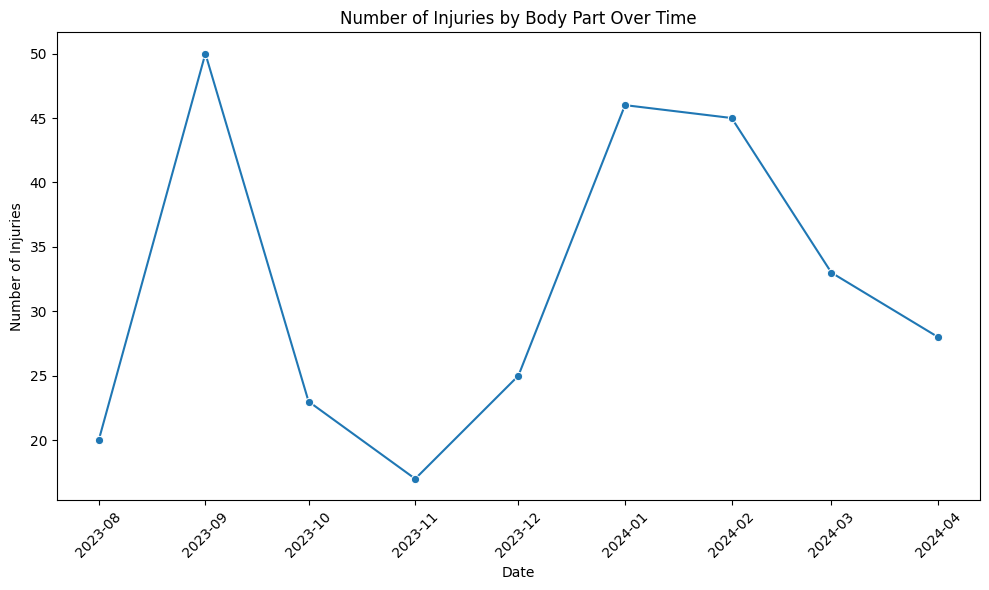

In [12]:
df_filtered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M')]).size().reset_index(name='Count')

# Convert period to datetime for easier plotting
df_filtered['ProblemDate'] = df_filtered['ProblemDate'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='ProblemDate', y='Count', marker='o')

# Customize plot labels and title
plt.title('Number of Injuries by Body Part Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

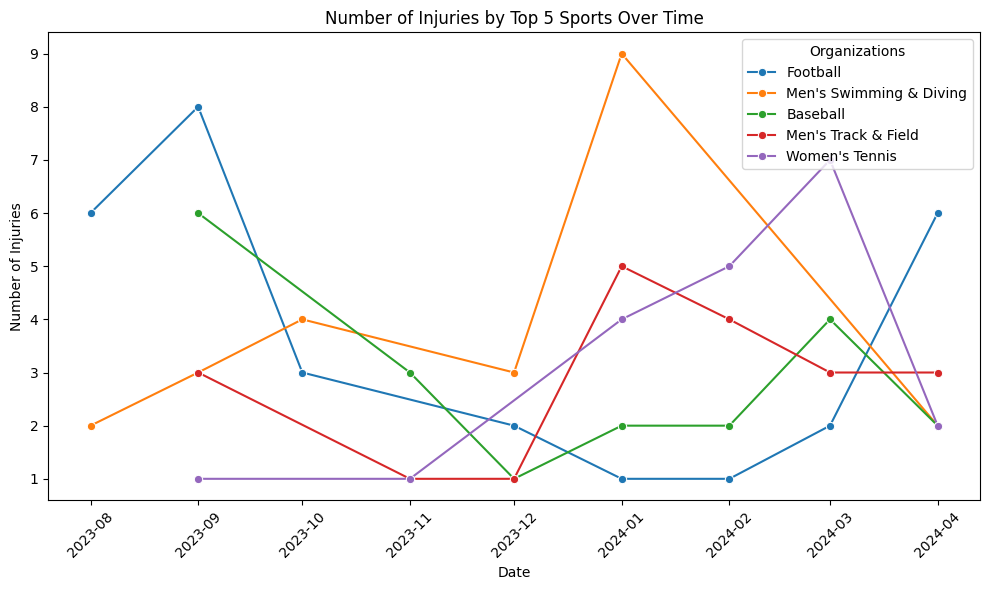

In [13]:
# Filtering data for sports
sport_filtered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M'), 'Organizations']).size().reset_index(name='Count')
sport_filtered = sport_filtered[sport_filtered["Organizations"].isin(sport_top5["Organizations"].tolist())]

# Convert period to datetime for easier plotting
sport_filtered['ProblemDate'] = sport_filtered['ProblemDate'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=sport_filtered, x='ProblemDate', y='Count', hue='Organizations', marker='o')

# Customize plot labels and title
plt.title('Number of Injuries by Top 5 Sports Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

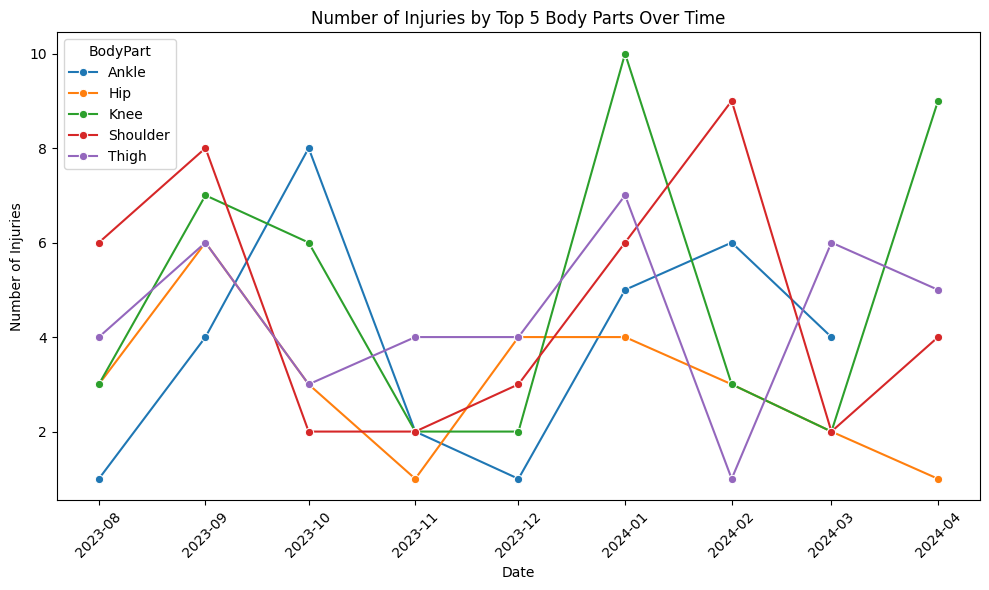

In [14]:
# Filtering data for body parts
body_part_filtered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M'), 'BodyPart']).size().reset_index(name='Count')
body_part_filtered = body_part_filtered[body_part_filtered["BodyPart"].isin(body_part_top5["BodyPart"].tolist())]

# Convert period to datetime for easier plotting
body_part_filtered['ProblemDate'] = body_part_filtered['ProblemDate'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=body_part_filtered, x='ProblemDate', y='Count', hue='BodyPart', marker='o')

# Customize plot labels and title
plt.title('Number of Injuries by Top 5 Body Parts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

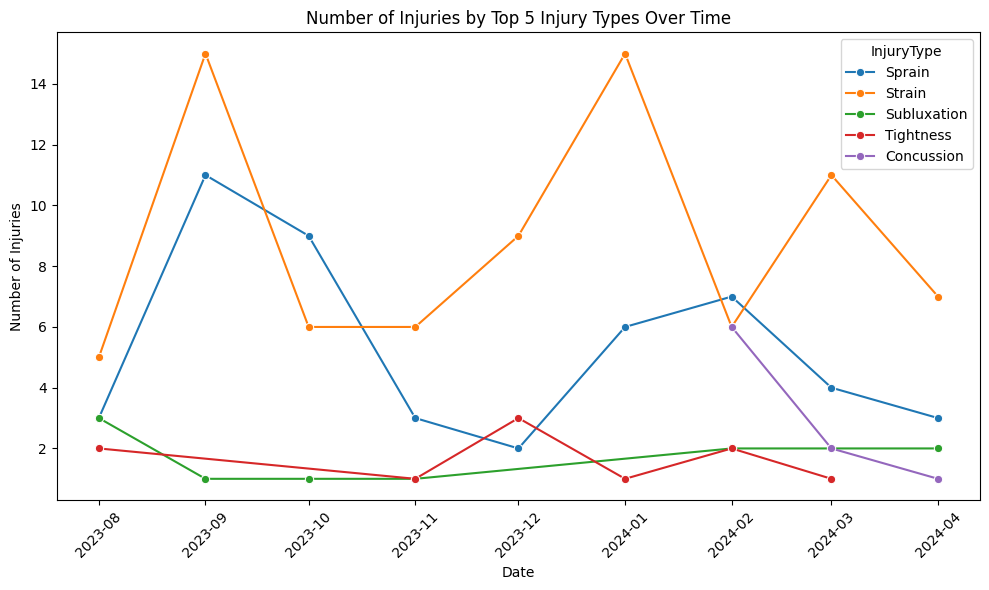

In [15]:
# Filtering data for injury types
injury_filtered = df_injuries.groupby([df_injuries['ProblemDate'].dt.to_period('M'), 'InjuryType']).size().reset_index(name='Count')
injury_filtered = injury_filtered[injury_filtered["InjuryType"].isin(injury_top5["InjuryType"].tolist())]

# Convert period to datetime for easier plotting
injury_filtered['ProblemDate'] = injury_filtered['ProblemDate'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=injury_filtered, x='ProblemDate', y='Count', hue='InjuryType', marker='o')

# Customize plot labels and title
plt.title('Number of Injuries by Top 5 Injury Types Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

In [16]:
# Read the CSV file into a pandas DataFrame
data = os.path.join(datadir, "baseball_coded.csv")
df_baseball = pd.read_csv(data)

# Date conversion
df_baseball.sort_values(by='Date', inplace = True)
df_baseball = df_baseball[df_baseball['Date'].notna()]
df_baseball["Date"] = df_baseball["Date"].str.replace("/", "-").apply(date_coversion)
df_baseball["Date"] = pd.to_datetime(df_baseball["Date"], format='%Y-%m-%d')

In [17]:
# Filtering data for plotting
lower_injury_baseball = df_injuries[(df_injuries['Organizations'] == "Baseball") & 
                                 (df_injuries['AffectedArea'] == "Lower Extremity")]

thigh_injuries_jumps = df_baseball[df_baseball['Code'] == "BASEB1"]
desc = thigh_injuries_jumps.sort_values(by='Date')

In [31]:
lower_extremity_baseball_2024 = df_baseball[df_baseball['Code'].isin(["BASEB19", "BASEB33", "BASEB1"])]

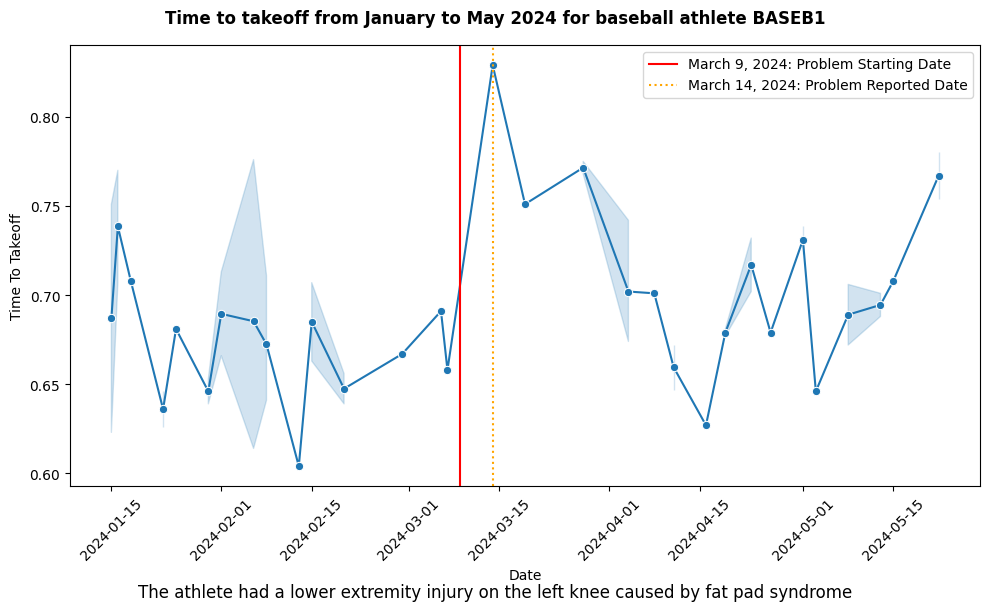

In [45]:
#Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Time To Takeoff', data=desc, marker = "o")
#sns.scatterplot(x='Date', y='Time To Takeoff', data=desc)
plt.suptitle('Time to takeoff from January to May 2024 for baseball athlete BASEB1', fontweight = "bold")
plt.xticks(rotation = 45)

# Add vertical line for March 9th 2024 for problem starting date
plt.axvline(pd.to_datetime("2024-03-09"), color='red', linestyle='-', label='March 9, 2024: Problem Starting Date')

# Add vertical line for March 14th 2024 for reported date
plt.axvline(pd.to_datetime("2024-03-14"), color='orange', linestyle=':', label='March 14, 2024: Problem Reported Date')

txt="The athlete had a lower extremity injury on the left knee caused by fat pad syndrome"
plt.figtext(0.5, 0.0001, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()


In [21]:
df_injuries.loc[df_injuries["Code"] == "BASEB1"]

,Code,Organizations,ProblemDate,ReportedDate,BodyPart,AffectedArea,Side,InjuryType,BodyPartName,CurrentStatus
250,BASEB1,Baseball,2024-03-09,03-13-2024,Knee,Lower Extremity,Left,Fat Pad Syndrome,NaN,Returned To Play As Tolerated


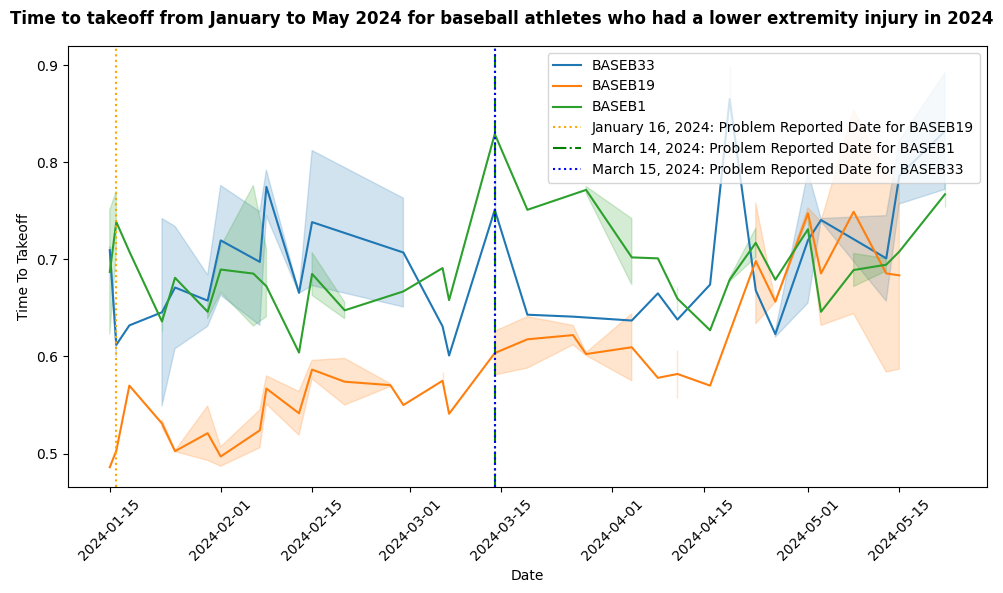

In [49]:
#Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Time To Takeoff', data=lower_extremity_baseball_2024, hue='Code')
plt.suptitle('Time to takeoff from January to May 2024 for baseball athletes who had a lower extremity injury in 2024', fontweight = "bold")
plt.xticks(rotation = 45)

plt.axvline(pd.to_datetime("2024-01-16"), color='orange', linestyle=':', label='January 16, 2024: Problem Reported Date for BASEB19')
plt.axvline(pd.to_datetime("2024-03-14"), color='green', linestyle='-.', label='March 14, 2024: Problem Reported Date for BASEB1')
plt.axvline(pd.to_datetime("2024-03-14"), color='blue', linestyle=':', label='March 15, 2024: Problem Reported Date for BASEB33')

plt.legend()
plt.tight_layout()
plt.show()


In [47]:
lower_injury_baseball

,Code,Organizations,ProblemDate,ReportedDate,BodyPart,AffectedArea,Side,InjuryType,BodyPartName,CurrentStatus
43,BASEB16,Baseball,2023-09-13,9/14/2023,Ankle,Lower Extremity,Left,Sprain,Anterior Talofibular,Returned To Play and Closed
100,BASEB23,Baseball,2023-11-10,11/10/2023,Thigh,Lower Extremity,Right,Strain,Hamstring (partial tear),Limited Activity
104,BASEB35,Baseball,2023-12-08,NaN,Thigh,Lower Extremity,Right,Strain,Hamstring (partial tear),Limited Activity
105,BASEB27,Baseball,2023-11-29,NaN,Thigh,Lower Extremity,Left,Strain,Semimembranosus,Returned To Play As Tolerated
106,BASEB27,Baseball,2023-11-29,NaN,Thigh,Lower Extremity,Left,Strain,Semitendinosus,Returned To Play As Tolerated
135,BASEB19,Baseball,2024-01-16,NaN,Thigh,Lower Extremity,Right,Strain,Vastus Medialis,Returned To Play As Tolerated
247,BASEB33,Baseball,2024-03-15,03-23-2024,Lower Leg,Lower Extremity,Left,Medial Tibial Stress Syndrome,NaN,Returned To Play As Tolerated
250,BASEB1,Baseball,2024-03-09,03-13-2024,Knee,Lower Extremity,Left,Fat Pad Syndrome,NaN,Returned To Play As Tolerated
